# Concrete samples

In [1]:
import pandas as pd

# Load house sales data

In [2]:
concrete = pd.read_csv("data/concrete_data.csv")

In [3]:
concrete

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# Explore

In [4]:
concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
concrete_set = concrete[['Cement', 'Strength']]
concrete_set

,Cement,Strength
0,540.0,79.99
1,540.0,61.89
2,332.5,40.27
3,332.5,41.05
4,198.6,44.30
...,...,...
1025,276.4,44.28
1026,322.2,31.18
1027,148.5,23.70
1028,159.1,32.77


In [6]:
concrete.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

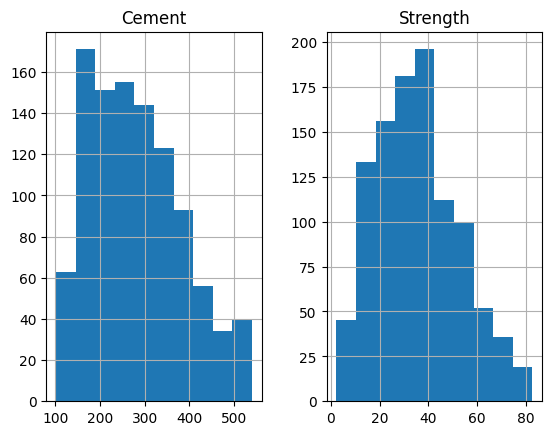

In [8]:
concrete_set.hist()
plt.show()

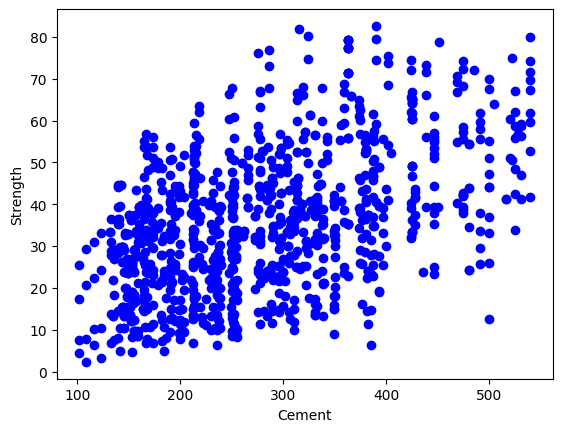

In [9]:
plt.scatter(concrete_set.Cement, concrete_set.Strength,  color='blue')
plt.xlabel("Cement")
plt.ylabel("Strength")
plt.show()

# Simple regression model that predicts Strength from Cement

In [10]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
x = concrete['Cement'].to_numpy().reshape(-1, 1)
y = concrete['Strength'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Train simple regression model

In [12]:
cement_model = LinearRegression().fit(x_train, y_train)

# Evaluate the quality of our model

In [13]:
print(cement_model.score(x_train, y_train))
print(cement_model.score(x_test, y_test))

0.22823519689380845
0.32221547485788693


# Explore model a little further

In [14]:
print(cement_model.intercept_)
print(cement_model.coef_)

14.663991392890079
[0.07674384]


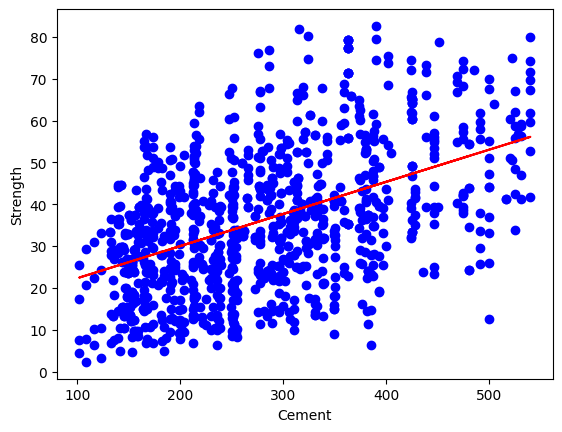

In [15]:
plt.scatter(concrete_set.Cement, concrete_set.Strength,  color='blue')
plt.plot(x_train, cement_model.coef_[0] * x_train + cement_model.intercept_, '-r')
plt.xlabel("Cement")
plt.ylabel("Strength")
plt.show()

In [16]:
strength_pred = cement_model.predict(x_test)
strength_pred[:10]

array([53.03591048, 24.07278595, 42.49130711, 54.72427492, 26.71277399,
       43.78827798, 41.98479778, 29.2683438 , 56.105664  , 40.91038405])

In [17]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, strength_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, strength_pred))

Mean squared error: 178.51
Coefficient of determination: 0.32


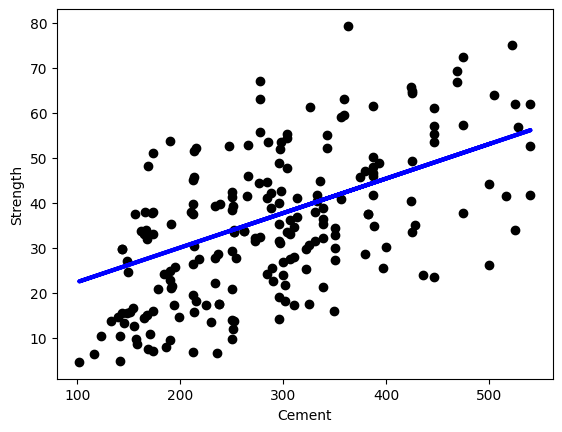

In [18]:
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, strength_pred, color="blue", linewidth=3)
plt.xlabel("Cement")
plt.ylabel("Strength")
plt.show()

# Explore other features of the data

In [19]:
my_features = ['Cement', 'Water', 'Superplasticizer', 'Fly Ash', 'Blast Furnace Slag', 'Age']

In [20]:
concrete[my_features].head()

,Cement,Water,Superplasticizer,Fly Ash,Blast Furnace Slag,Age
0,540.0,162.0,2.5,0.0,0.0,28
1,540.0,162.0,2.5,0.0,0.0,28
2,332.5,228.0,0.0,0.0,142.5,270
3,332.5,228.0,0.0,0.0,142.5,365
4,198.6,192.0,0.0,0.0,132.4,360


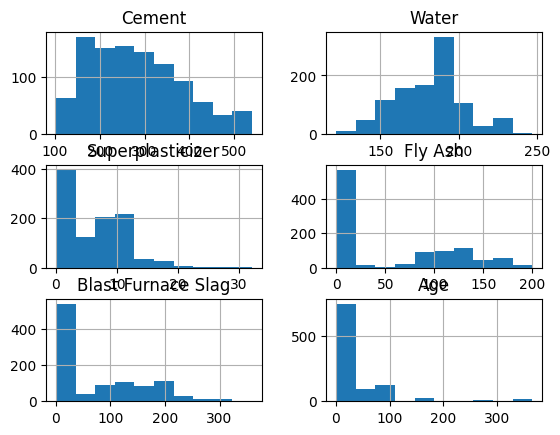

In [21]:
concrete[my_features].hist()
plt.show()

In [22]:
x_multi = np.asanyarray(concrete[my_features])
y_multi = np.asanyarray(concrete['Strength'])
x_multi_train, x_multi_test, y_multi_train, y_multi_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=0)

# Build a model with these additional features

In [23]:
multi_model = LinearRegression().fit(x_multi_train, y_multi_train)

# Compare simple model with more complex one

In [24]:
print(my_features)

['Cement', 'Water', 'Superplasticizer', 'Fly Ash', 'Blast Furnace Slag', 'Age']


In [25]:
print(cement_model.score(x_train, y_train))
print(cement_model.score(x_test, y_test))

print(multi_model.score(x_multi_train, y_multi_train))
print(multi_model.score(x_multi_test, y_multi_test))

0.22823519689380845
0.32221547485788693
0.6069940124962994
0.6389654472304886


# Apply learned models to make predictions

In [26]:
sample1 = concrete[concrete.index == 1025]

In [27]:
sample1

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28


In [28]:
print(sample1['Strength'])
print(sample1['Cement'])

1025    44.28
Name: Strength, dtype: float64
1025    276.4
Name: Cement, dtype: float64


In [29]:
cement_pred = cement_model.predict(sample1['Cement'].to_numpy().reshape(-1, 1))
cement_pred[0]

35.87598826257177

In [30]:
print(f"Strength sample ID {sample1.index[0]} is {multi_model.predict(np.asanyarray(sample1[my_features]))[0]:.2f}")

Strength sample ID 1025 is 40.66


## Prediction for a second sample

In [31]:
sample2 = concrete[concrete.index==1]

In [32]:
sample2

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


In [33]:
cement_pred = cement_model.predict(sample2['Cement'].to_numpy().reshape(-1, 1))
cement_pred[0]

56.10566400370091

In [34]:
print(f"Strength sample ID {sample2.index[0]} is {multi_model.predict(np.asanyarray(sample2[my_features]))[0]:.2f}")

Strength sample ID 1 is 53.68


## Prediction for a super fancy home

In [35]:
super_concrete = {'Cement':[700], 
                  'Water':[300],
                  'Superplasticizer':[30],
                  'Fly Ash':[10],
                  'Blast Furnace Slag':[20],
                  'Age':[28],
                  'Fine Aggregate':[1000],
                  'Coarse Aggregate':[200],
                  }

In [36]:
df_super_concrete = pd.DataFrame.from_dict(super_concrete)
df_super_concrete['Cement']

0    700
Name: Cement, dtype: int64

In [37]:
cement_pred = cement_model.predict(df_super_concrete['Cement'].to_numpy().reshape(-1, 1))
cement_pred[0]

68.38467811060782

In [38]:
print(f"Strength sample ID Super concrete is {multi_model.predict(np.asanyarray(df_super_concrete[my_features]))[0]:.2f}")

Strength sample ID Super concrete is 48.09


In [39]:
adv_features = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']

In [40]:
x_adv = np.asanyarray(concrete[adv_features])
y_adv = np.asanyarray(concrete['Strength'])
x_adv_train, x_adv_test, y_adv_train, y_adv_test = train_test_split(x_adv, y_adv, test_size=0.2, random_state=0)

In [41]:
adv_model = LinearRegression().fit(x_adv_train, y_adv_train)

In [42]:
print(cement_model.score(x_train, y_train))
print(cement_model.score(x_test, y_test))

print(multi_model.score(x_multi_train, y_multi_train))
print(multi_model.score(x_multi_test, y_multi_test))

print(adv_model.score(x_adv_train, y_adv_train))
print(adv_model.score(x_adv_test, y_adv_test))

0.22823519689380845
0.32221547485788693
0.6069940124962994
0.6389654472304886
0.6091237370441136
0.6369606518338298


In [43]:
print(f"Strength sample ID Super concrete is {adv_model.predict(np.asanyarray(df_super_concrete[adv_features]))[0]:.2f}")

Strength sample ID Super concrete is 52.03
